## Ejercicio 6.45
*Kassimali, A. (2012). Matrix Analysis of Structures. 2nd Edition. Cengage Learning.*

![NON](img/ejercicio_6.45.png)

In [7]:
from PyStructMatrix import StructuralMatrixAnalysis, StructuralPlotter

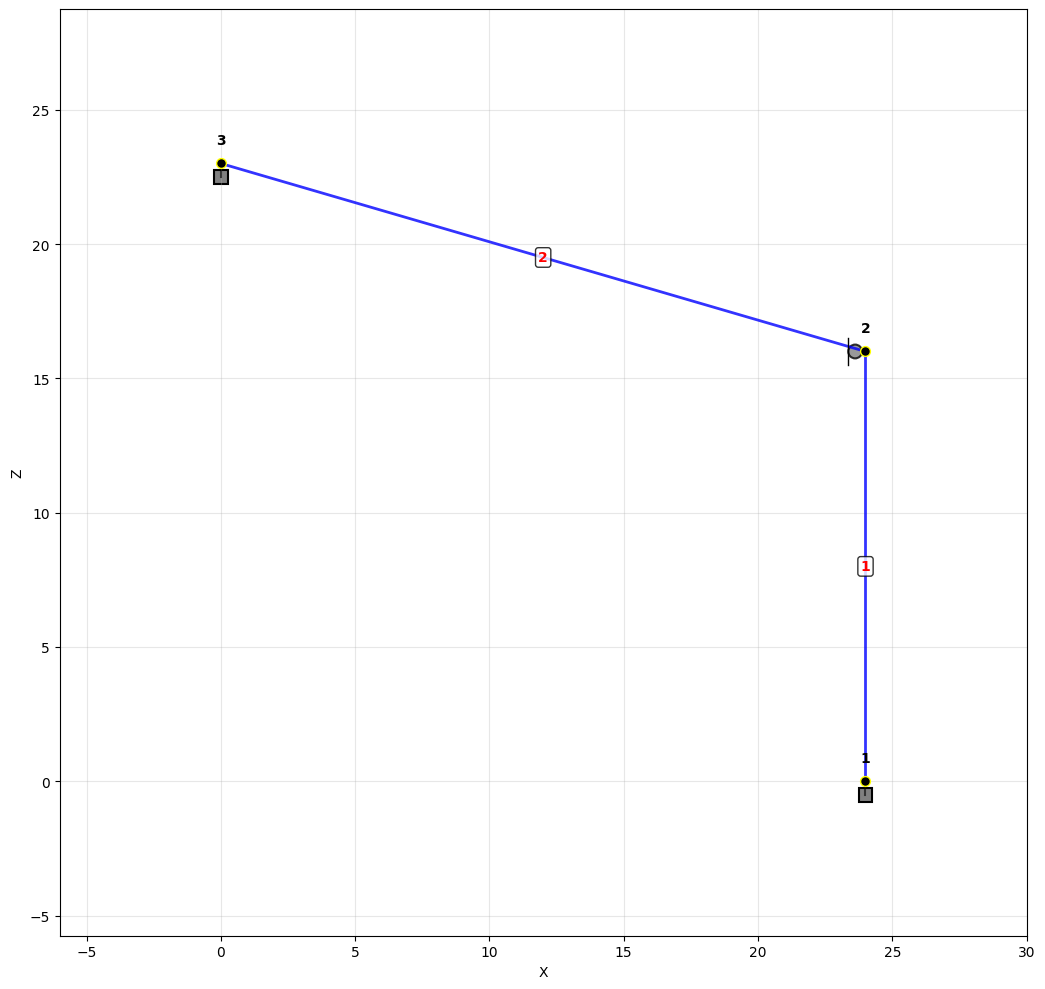

In [8]:
# Crear el sistema estructural
system = StructuralMatrixAnalysis()
plotter = StructuralPlotter(system)

# Definir propiedades del material y secciones
E = 200 * 10 ** 6
A = 16000 * 10**-6
I = 1186 * 10**-6

# Definición de Nodos (Geometría)
system.defineNode(1, x=24, z=0)
system.defineNode(2, x=24, z=16)
system.defineNode(3, x=0, z=16+7)

# Asignación de Restricciones (Condiciones de Apoyo)
system.assignJoint.restrictions(1, ux=True, uz=True, ry=True)
system.assignJoint.restrictions(2, ux=True, uz=False, ry=False)
system.assignJoint.restrictions(3, ux=True, uz=True, ry=True)

# Definición de Elementos (Conectividad)
system.defineElement(1, 1, 2, A=A, E=E, I=I)
system.defineElement(2, 2, 3, A=A, E=E, I=I)

# Asignación de Cargas
system.assignElement.gravityUniformLoad(2, w=20)

# Visualización Inicial
plotter.showFrame()

In [9]:
# Ejecución del Análisis Matricial
system.RunCompleteAnalysis(show_process=True)


--------------------------------------------------------------------------------
 1. INFORMACIÓN GENERAL
--------------------------------------------------------------------------------
Número de nodos: 3
Número de elementos: 2
Grados de libertad totales: 9
Grados de libertad restringidos (desplazamientos conocidos): 7 de 9
GL restringidos: [0 1 2 3 6 7 8]
Grados de libertad libres (fuerzas conocidas): 2 de 9
GL libres: [4 5]

--------------------------------------------------------------------------------
 2. MATRICES PARTICIONADAS
--------------------------------------------------------------------------------
KAA (2x2):
  |         4 |          5 |

  |     210203 |      -2186 |
  |      -2186 |      97252 |
 
KAB (2x7):
  |         0 |          1 |          2 |          3 |          6 |          7 |          8 |
 
  |          0 |    -200000 |          0 |     -34357 |      34357 |     -10203 |      -2186 |
  |      -5559 |          0 |      29650 |       4922 |        638 |      

In [10]:
# Obtención de Resultados Detallados de Elementos
system.getInfoElements()

ELEMENTO 1: [1, 2]  - Tipo 0
PROPIEDADES
  Longitud: 16.000
  Área (A): 1.6000e-02
  Módulo elástico (E): 2.0000e+08
  Momento de inercia (I): 1.1860e-03
  Liberaciones:  Nodo i = NO | Nodo j = NO
  Orientación: C=0.000 | S=1.000

CARGAS APLICADAS:
  No hay cargas aplicadas

MATRIZ DE TRANSFORMACIÓN T (6x6):
  |      0.000 |      1.000 |      0.000 |      0.000 |      0.000 |      0.000 |
  |     -1.000 |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      1.000 |      0.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |      0.000 |      1.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |     -1.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |      1.000 |

MATRIZ DE RIGIDEZ LOCAL K (6x6):
  | 200000.000 |      0.000 |      0.000 | -200000.000 |      0.000 |      0.000 |
  |      0.000 |    694.922 |   5559.375 |      0.000 |   -694.922 |   5559.375 |

In [11]:
system.getInfoNodes()

Node 1: (24, 0) - Empotrado
  Desplazamientos: Ux=0.0000e+00, Uz=0.0000e+00, Ry=0.0000e+00
  Fuerzas: Fx=-57.029, Fz=216.529, My=304.156

Node 2: (24, 16) - Móvil en Z
  Desplazamientos: Ux=0.0000e+00, Uz=-1.0826e-03, Ry=1.0258e-02
  Fuerzas: Fx=87.686, Fz=0.000, My=0.000

Node 3: (0, 23) - Empotrado
  Desplazamientos: Ux=0.0000e+00, Uz=0.0000e+00, Ry=0.0000e+00
  Fuerzas: Fx=-30.656, Fz=283.471, My=1197.027


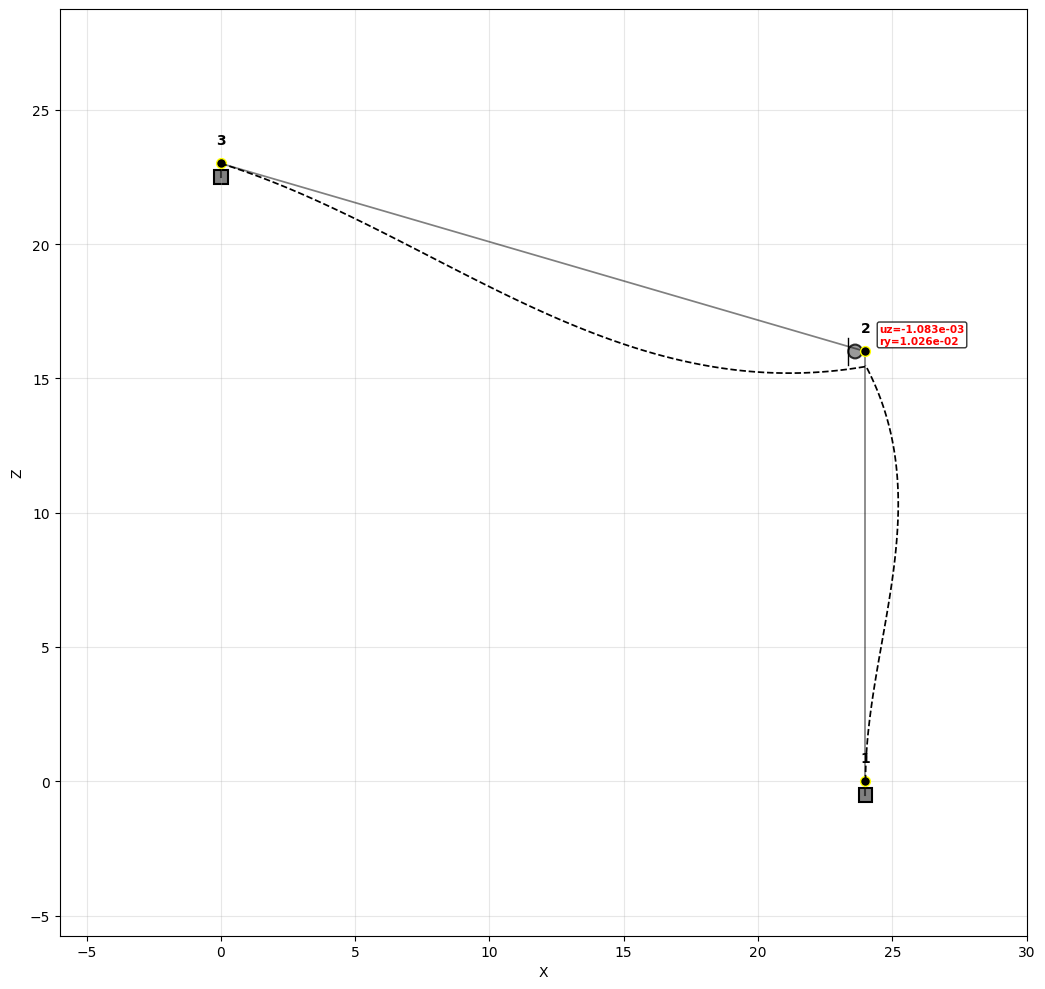

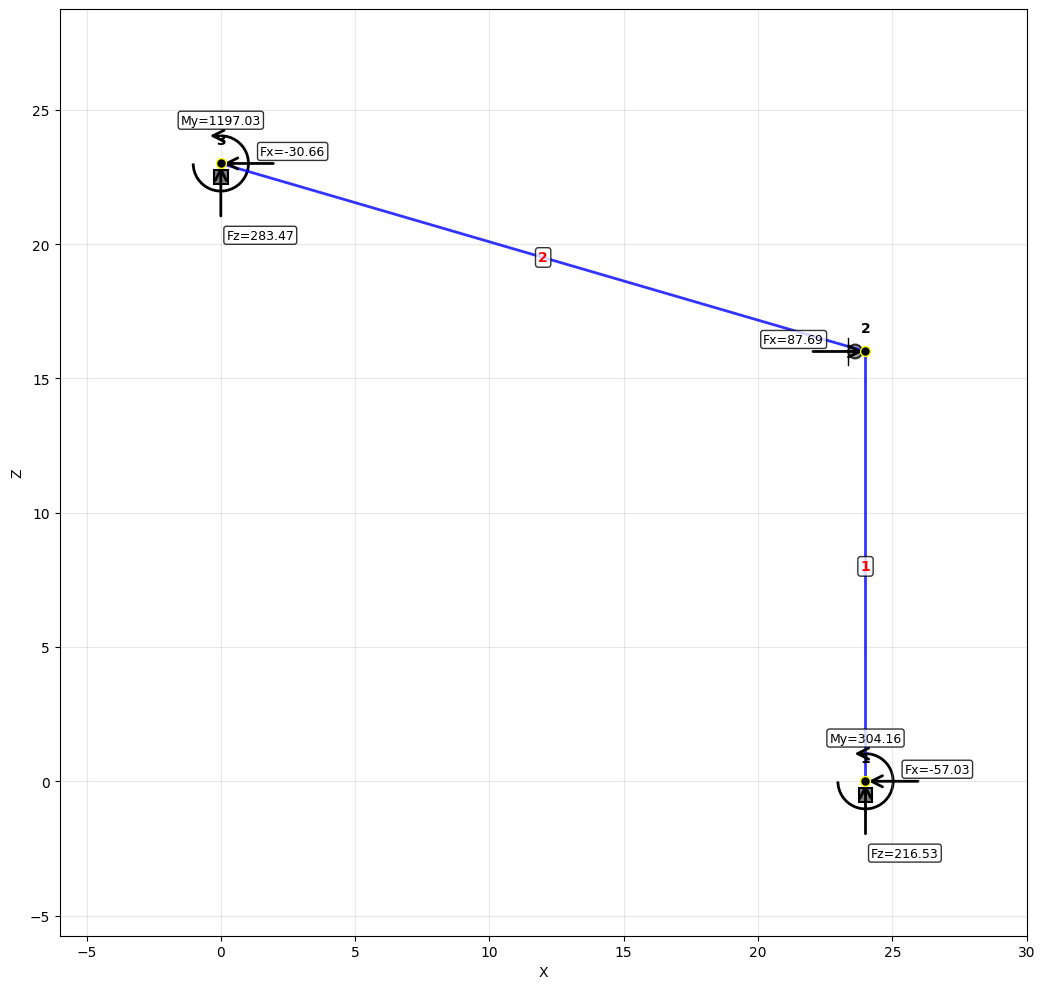

In [12]:
# Visualización de Resultados
plotter.showDeformedShape(escala=0.25)
plotter.showReactions()